## 20250318 statistic almost velocity is larger while human

1. Only tree scenario
      (1) Beaufort 2 
      (2) Beaufort 6
2. Only human scenario (FOV)
3. Both of tree and human

** match = re.search(r'(\d+m_+[^\s]+).*?_(Run\d+)', text)

### 1. Only tree scenario

1.Only tree scenario..Beaufort 2

false alarm rate is : 0.28 % , reduce to 0.00 %


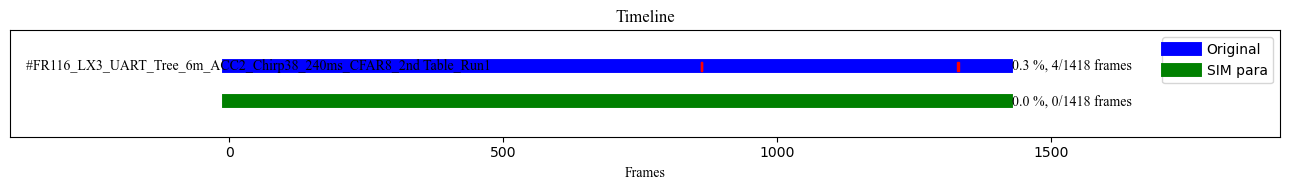

In [5]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def test(path, original, item):
    xlsx_files = glob.glob(f'{path}')

    data_list = []
    fig, ax = plt.subplots(figsize=(13, len(xlsx_files) * 2)) 
    max_frame_tmp = 0
    SIM_ff = 0
    total_frame = 0
    orig_ff = 0

    for index, xlsx_file in enumerate(xlsx_files):
        xlsx_SIM = xlsx_file.replace(original, item)
        index_c = 2 * index

        # Read the data from Excel files
        data = pd.read_excel(xlsx_file, sheet_name='TrackedTarget', engine="openpyxl")
        data_SIM = pd.read_excel(xlsx_SIM, sheet_name='TrackedTarget', engine="openpyxl")
        data.rename(columns={'@_Frame': 'FrameNo'}, inplace=True)
        data_SIM.rename(columns={'@_Frame': 'FrameNo'}, inplace=True)
        data_pc = pd.read_excel(xlsx_file, sheet_name='CloudPoint', engine="openpyxl")

        file_name = os.path.basename(xlsx_file).split(".")[0]
        end_frame = data_pc['@_Frame'].max()
        start_from = data_pc['@_Frame'].min()
        each_frame = end_frame - start_from + 1

        fa_location = pd.DataFrame(columns=['FrameNo', 'Result', 'orig_result'])

        for frame in range(start_from, end_frame + 1):
            result = 1 if (data_SIM[data_SIM['FrameNo'] == frame]['@_Stat'] == 3).any() else 0
            orig_result = 1 if (data[data['FrameNo'] == frame]['@_Stat'] == 3).any() else 0
            fa_location = fa_location._append({'FrameNo': frame, 'Result': result, 'orig_result': orig_result}, ignore_index=True)    

        if max_frame_tmp < each_frame:
            max_frame_tmp = each_frame

        avg = sum(fa_location['Result']) / each_frame * 100
        ff_point = sum(fa_location['Result'])
        orig_avg = sum(fa_location['orig_result']) / each_frame * 100
        orig_ff_point = sum(fa_location['orig_result'])

        ax.plot([0, each_frame], [-index_c, -index_c], color='blue', linewidth=10, label='Original' if index == 0 else "", zorder = 1)
        for ind, ff in enumerate(fa_location['orig_result']):
            if ff == 1:
                rect = Rectangle((ind, -index_c - 0.14), 1.2, 0.25, color='red', zorder = 2)
                ax.add_patch(rect)

        ax.plot([0, each_frame], [-index_c-1, -index_c-1], color='green', linewidth=10, label='SIM para' if index == 0 else "", zorder = 1)
        for ind, ff in enumerate(fa_location['Result']):
            if ff == 1:
                rect = Rectangle((ind, -index_c - 1.15), 1.2, 0.25, color='red', zorder = 2)
                ax.add_patch(rect)

        ax.text(-370, -index_c, file_name, verticalalignment='center', font='Times New Roman')
        ax.text(each_frame + 10, -index_c, f'{orig_avg:.1f} %, {orig_ff_point}/{each_frame} frames', verticalalignment='center', font='Times New Roman')
        ax.text(each_frame + 10, -index_c-1, f'{avg:.1f} %, {ff_point}/{each_frame} frames', verticalalignment='center', font='Times New Roman')

        total_frame += each_frame
        orig_ff += orig_ff_point
        SIM_ff += ff_point
        
    print(f"1.Only tree scenario..Beaufort 2")
    print()    
    print(f"false alarm rate is : {orig_ff / total_frame * 100:.2f} % , reduce to {SIM_ff / total_frame * 100:.2f} %")

    ax.set_xlim(-400, max_frame_tmp + 500)
    ax.set_ylim(-len(xlsx_files) * 2, 1)
    ax.set_yticks([])
    ax.set_title("Timeline", fontname='Times New Roman')
    ax.set_xlabel("Frames", fontname='Times New Roman')
    ax.legend()
    ax.set_aspect(aspect='auto')
    plt.tight_layout()  # Adjust layout for better fit
    # plt.savefig('original_aac3.svg', format='svg')
    plt.show()

path = 'D:/u10962/github/20250102-treefilter/20250318_sim/1.Only tree scenario/Beaufort2/20250227_S6QI/#FR116_LX3_UART_Tree_6m_ACC2_Chirp38_240ms_CFAR8_2nd Table_Run1.rec.xlsx'
test(path, "20250227_S6QI", "20250227_S6QI_sim")

1.Only tree scenario..Beaufort 6

false alarm rate is : 100.00 % , reduce to 0.00 %


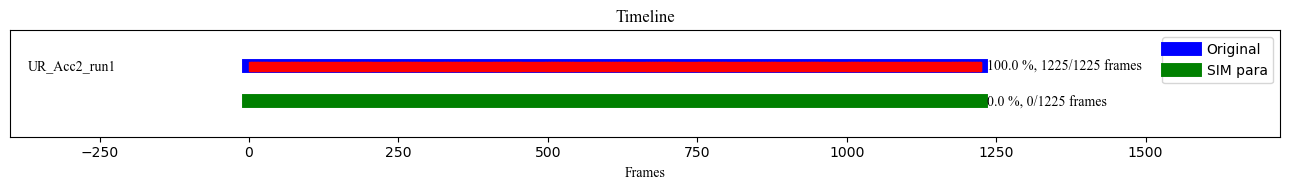

In [2]:
import os
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def test(path, original, item):
    xlsx_files = glob.glob(f'{path}')

    data_list = []
    fig, ax = plt.subplots(figsize=(13, len(xlsx_files) * 2))  # Adjusted figure size for better spacing
    max_frame_tmp = 0
    SIM_ff = 0
    total_frame = 0
    orig_ff = 0

    for index, xlsx_file in enumerate(xlsx_files):
        xlsx_SIM = xlsx_file.replace(original, item)
        index_c = 2 * index

        # Read the data from Excel files
        data = pd.read_excel(xlsx_file, sheet_name='TrackedTarget', engine="openpyxl")
        data_SIM = pd.read_excel(xlsx_SIM, sheet_name='TrackedTarget', engine="openpyxl")
        data.rename(columns={'@_Frame': 'FrameNo'}, inplace=True)
        data_SIM.rename(columns={'@_Frame': 'FrameNo'}, inplace=True)
        data_pc = pd.read_excel(xlsx_file, sheet_name='CloudPoint', engine="openpyxl")

        file_name = os.path.basename(xlsx_file).split(".")[0]
        end_frame = data_pc['@_Frame'].max()
        start_from = data_pc['@_Frame'].min()
        each_frame = end_frame - start_from + 1

        fa_location = pd.DataFrame(columns=['FrameNo', 'Result', 'orig_result'])

        for frame in range(start_from, end_frame + 1):
            result = 1 if (data_SIM[data_SIM['FrameNo'] == frame]['@_Stat'] == 3).any() else 0
            orig_result = 1 if (data[data['FrameNo'] == frame]['@_Stat'] == 3).any() else 0
            fa_location = fa_location._append({'FrameNo': frame, 'Result': result, 'orig_result': orig_result}, ignore_index=True)    

        if max_frame_tmp < each_frame:
            max_frame_tmp = each_frame

        avg = sum(fa_location['Result']) / each_frame * 100
        ff_point = sum(fa_location['Result'])
        orig_avg = sum(fa_location['orig_result']) / each_frame * 100
        orig_ff_point = sum(fa_location['orig_result'])

        ax.plot([0, each_frame], [-index_c, -index_c], color='blue', linewidth=10, label='Original' if index == 0 else "", zorder = 1)
        for ind, ff in enumerate(fa_location['orig_result']):
            if ff == 1:
                rect = Rectangle((ind, -index_c - 0.14), 1.2, 0.25, color='red', zorder = 2)
                ax.add_patch(rect)

        ax.plot([0, each_frame], [-index_c-1, -index_c-1], color='green', linewidth=10, label='SIM para' if index == 0 else "", zorder = 1)
        for ind, ff in enumerate(fa_location['Result']):
            if ff == 1:
                rect = Rectangle((ind, -index_c - 1.15), 1.2, 0.25, color='red', zorder = 2)
                ax.add_patch(rect)

        ax.text(-370, -index_c, file_name, verticalalignment='center', font='Times New Roman')
        ax.text(each_frame + 10, -index_c, f'{orig_avg:.1f} %, {orig_ff_point}/{each_frame} frames', verticalalignment='center', font='Times New Roman')
        ax.text(each_frame + 10, -index_c-1, f'{avg:.1f} %, {ff_point}/{each_frame} frames', verticalalignment='center', font='Times New Roman')

        total_frame += each_frame
        orig_ff += orig_ff_point
        SIM_ff += ff_point
        
    print(f"1.Only tree scenario..Beaufort 6")
    print()    
    print(f"false alarm rate is : {orig_ff / total_frame * 100:.2f} % , reduce to {SIM_ff / total_frame * 100:.2f} %")

    ax.set_xlim(-400, max_frame_tmp + 500)
    ax.set_ylim(-len(xlsx_files) * 2, 1)
    ax.set_yticks([])
    ax.set_title("Timeline", fontname='Times New Roman')
    ax.set_xlabel("Frames", fontname='Times New Roman')
    ax.legend()
    ax.set_aspect(aspect='auto')
    plt.tight_layout()  # Adjust layout for better fit
    # plt.savefig('original_aac3.svg', format='svg')
    plt.show()

path = 'D:/u10962/github/20250102-treefilter/20250318_sim/1.Only tree scenario/Beaufort6/UR_Acc2_run1.rec.xlsx'
test(path, "UR_Acc2_run1.rec", "UR_Acc2_run1.rec_sim")

### Only human scenario (FOV)

In [5]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import re
import math

path = "D:/u10962/github/20250102-treefilter/20250318_sim/2.Only human scenario/20241119_S6QI_FOV for miles test/"

xlsx_files = glob.glob(f'{path}*.xlsx')
range_choice = {'2':[2, 4], '3':[2, 5], '4':[2, 7], '5':[3, 10], '6':[5, 10], '7':[5, 10], '8':[7, 11], '10':[7, 15]}

result = []

for xlsx_file in xlsx_files:
    file_name = os.path.basename(xlsx_file)
    data = pd.read_excel(xlsx_file, sheet_name= 'TrackedTarget', engine="openpyxl") 
    range = re.findall(r'_(\d)m_', os.path.basename(xlsx_file))[0]
    data = data[data['@_Stat'] == 3]
    data = data[(data['@_tY'] > range_choice[range][0]) & (data['@_tY'] < range_choice[range][1])]        
    cls_angle = np.arctan(data['@_tX']/data['@_tY'])*180/np.pi
    angle_min = cls_angle.min()
    angle_max = cls_angle.max()
    # print(f'{file_name} : min {angle_min:.2f}, Range_min = {r_min:.2f}, max {angle_max:.2f}, Range_max = {r_max:.2f}')

    data_LX3 = pd.read_excel(xlsx_file.replace(f'20241119_S6QI_FOV for miles test', f'20241119_S6QI_FOV for miles test_sim'), sheet_name= 'TrackedTarget', engine="openpyxl") 
    data_LX3 = data_LX3[data_LX3['@_Stat'] == 3]
    data_LX3 = data_LX3[(data_LX3['@_tY'] > range_choice[range][0]) & (data_LX3['@_tY'] < range_choice[range][1])]        
    cls_angle_LX3 = np.arctan(data_LX3['@_tX']/data_LX3['@_tY'])*180/np.pi
    angle_min_LX3 = cls_angle_LX3.min()
    angle_max_LX3 = cls_angle_LX3.max()
    # print(f'LX3 : min {angle_min_LX3:.2f}, Range_min = {r_min_LX3:.2f}, max {angle_max_LX3:.2f}, Range_max = {r_max_LX3:.2f}')


    Angle_Min_diff = angle_min - angle_min_LX3
    Angle_Max_diff = angle_max - angle_max_LX3

    
    match = re.search(r'Fov_(\d+m).*?_(Run\d+)', xlsx_file)
    file_name = f"{match.group(1)}_{match.group(2)}"

    result.append({
        'File': file_name,
        'orig_Min': f'{angle_min:.2f}',        
        'orig_Max': f'{angle_max:.2f}',
        'sim_Min': f'{angle_min_LX3:.2f}',        
        'sim_Max': f'{angle_max_LX3:.2f}',
        'inc_l': f'{Angle_Min_diff:.2f}',
        'inc_r': f'{-Angle_Max_diff:.2f}',
    })

results_df = pd.DataFrame(result)

print(f"Only human scenario (FOV)")
print(f"dataset : 20241119_S6QI_FOV for miles test")
print()  
print(results_df)
output_path = "Results2.xlsx"
results_df.to_excel(output_path, index=False, engine='openpyxl')



Only human scenario (FOV)
dataset : 20241119_S6QI_FOV for miles test

       File orig_Min orig_Max sim_Min sim_Max  inc_l  inc_r
0   2m_Run1   -58.77    44.37  -58.16   43.95  -0.61  -0.42
1   2m_Run2   -54.60    49.34  -57.88   48.55   3.28  -0.79
2   2m_Run3   -47.27    58.36  -54.84   57.67   7.57  -0.69
3   3m_Run1   -64.00    60.90  -63.29   60.00  -0.71  -0.90
4   3m_Run2   -58.82    55.70  -58.25   56.46  -0.57   0.76
5   3m_Run3   -61.89    45.70  -61.61   45.00  -0.28  -0.70
6   4m_Run1   -53.83    36.45  -53.77   40.94  -0.06   4.49
7   4m_Run2   -58.89    46.34  -58.27   46.36  -0.62   0.03
8   4m_Run3   -62.22    34.95  -61.43   34.24  -0.79  -0.71
9   5m_Run1   -56.95    32.15  -57.14   31.74   0.19  -0.40
10  5m_Run2   -56.63    26.03  -56.11   26.23  -0.52   0.20
11  5m_Run3   -46.34    34.89  -44.48   34.72  -1.86  -0.16
12  6m_Run1   -52.15    23.35  -51.88   27.40  -0.27   4.05
13  6m_Run2   -54.31    22.37  -51.28   22.25  -3.03  -0.12
14  6m_Run3   -54.75    34.53 

### Both of tree and human

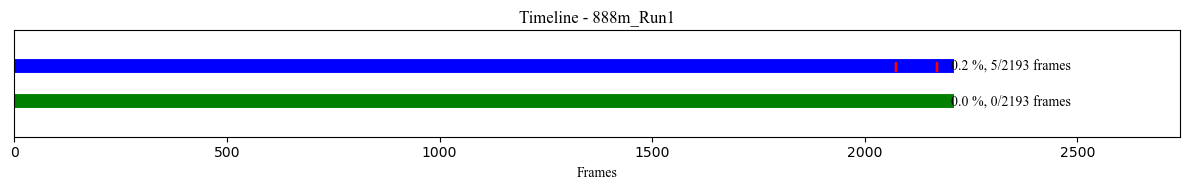

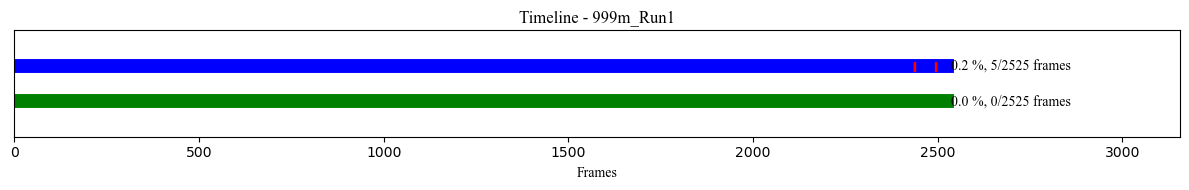

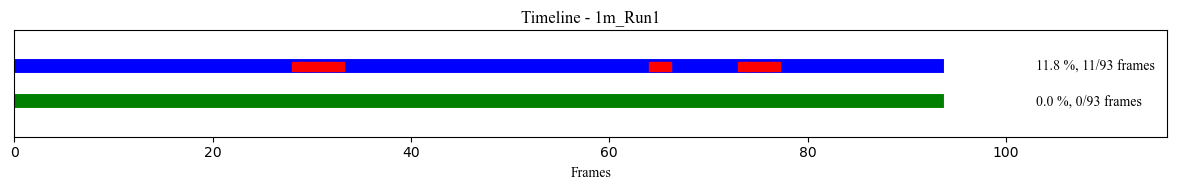

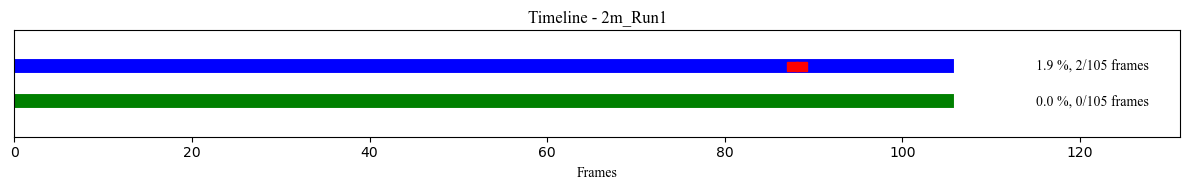

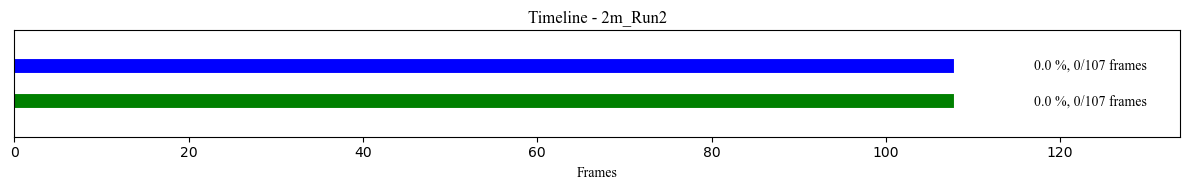

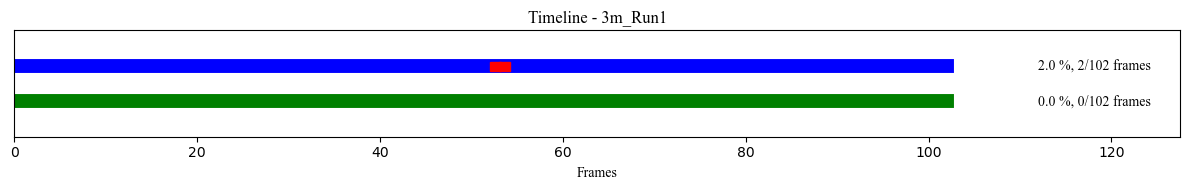

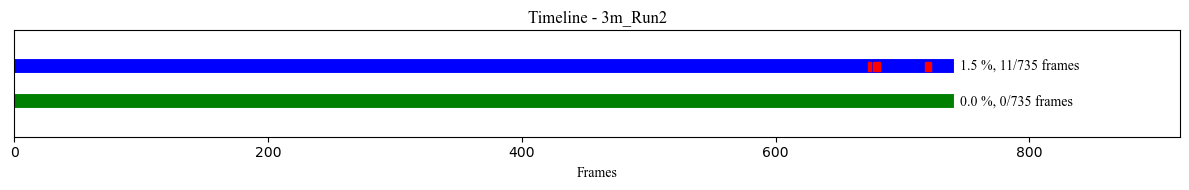

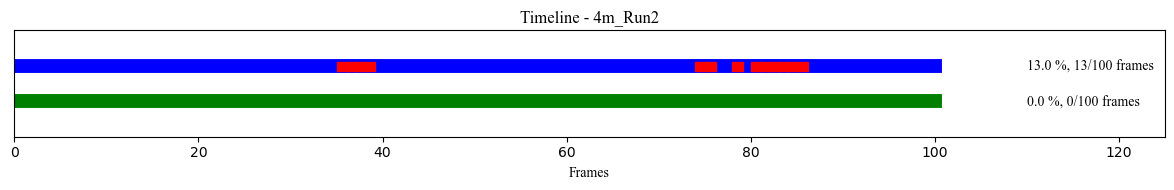

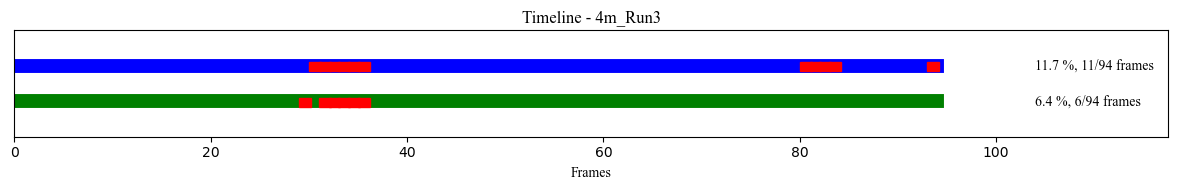

tree scenario..Beaufort 2
dataset : 20250227_S6QI
false alarm rate is : 0.99 % , reduce to 0.10 %


In [1]:
import os
import re
import glob
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.patches import Rectangle

def test(path, original, item):
    xlsx_files = glob.glob(f'{path}')

    max_frame_tmp = 0
    SIM_ff = 0
    total_frame = 0
    orig_ff = 0

    for index, xlsx_file in enumerate(xlsx_files):
        xlsx_SIM = xlsx_file.replace(original, item)

        data = pd.read_excel(xlsx_file, sheet_name='TrackedTarget', engine="openpyxl")
        data_SIM = pd.read_excel(xlsx_SIM, sheet_name='TrackedTarget', engine="openpyxl")
        data.rename(columns={'@_Frame': 'FrameNo'}, inplace=True)
        data_SIM.rename(columns={'@_Frame': 'FrameNo'}, inplace=True)
        data_pc = pd.read_excel(xlsx_file, sheet_name='CloudPoint', engine="openpyxl")

        match = re.search(r'(\d+m)_ACC2.*?_(Run\d+)', xlsx_file)
        file_name = f"{match.group(1)}_{match.group(2)}"
        end_frame = data_pc['@_Frame'].max()
        start_from = data_pc['@_Frame'].min()
        each_frame = end_frame - start_from + 1

        fa_location = pd.DataFrame(columns=['FrameNo', 'Result', 'orig_result'])

        for frame in range(start_from, end_frame + 1):
            result = 1 if ((data_SIM[data_SIM['FrameNo'] == frame]['@_Stat'] == 3) & 
                           (data_SIM[data_SIM['FrameNo'] == frame]['@_tY'] > 7.5)).any() else 0
            orig_result = 1 if ((data[data['FrameNo'] == frame]['@_Stat'] == 3) & 
                                (data[data['FrameNo'] == frame]['@_tY'] > 7.5)).any() else 0
            fa_location = fa_location._append({'FrameNo': frame, 'Result': result, 'orig_result': orig_result}, ignore_index=True)    

        if max_frame_tmp < each_frame:
            max_frame_tmp = each_frame

        avg = sum(fa_location['Result']) / each_frame * 100
        ff_point = sum(fa_location['Result'])
        orig_avg = sum(fa_location['orig_result']) / each_frame * 100
        orig_ff_point = sum(fa_location['orig_result'])

        fig, ax = plt.subplots(figsize=(12, 2))

        ax.plot([0, each_frame], [0, 0], color='blue', linewidth=10, label='Original', zorder=1)
        for ind, ff in enumerate(fa_location['orig_result']):
            if ff == 1:
                rect = Rectangle((ind, -0.14), 1.2, 0.25, color='red', zorder=2)
                ax.add_patch(rect)

        ax.plot([0, each_frame], [-1, -1], color='green', linewidth=10, label='SIM para', zorder=1)
        for ind, ff in enumerate(fa_location['Result']):
            if ff == 1:
                rect = Rectangle((ind, -1.15), 1.2, 0.25, color='red', zorder=2)
                ax.add_patch(rect)

        # ax.text(-100, 0, file_name, verticalalignment='center', font='Times New Roman')
        ax.text(each_frame + 10, 0, f'{orig_avg:.1f} %, {orig_ff_point}/{each_frame} frames', verticalalignment='center', font='Times New Roman')
        ax.text(each_frame + 10, -1, f'{avg:.1f} %, {ff_point}/{each_frame} frames', verticalalignment='center', font='Times New Roman')

        ax.set_xlim(0, each_frame*1.25)
        ax.set_ylim(-2, 1)
        ax.set_yticks([])
        ax.set_title(f"Timeline - {file_name}", fontname='Times New Roman')
        ax.set_xlabel("Frames", fontname='Times New Roman')
        # ax.legend()
        ax.set_aspect(aspect='auto')
        plt.tight_layout()

        plt.show()  

        total_frame += each_frame
        orig_ff += orig_ff_point
        SIM_ff += ff_point

    print(f"tree scenario..Beaufort 2")
    print(f"dataset : 20250227_S6QI")
    print(f"false alarm rate is : {orig_ff / total_frame * 100:.2f} % , reduce to {SIM_ff / total_frame * 100:.2f} %")

path = 'D:/u10962/github/20250102-treefilter/20250318_sim/3.Both of tree and human/20250227_S6QI/*.xlsx'
test(path, "20250227_S6QI", "20250227_S6QI_sim")


In [4]:
import glob
import pandas as pd
import matplotlib.pyplot as plt
import os
import numpy as np
import re
import math

path = "D:/u10962/github/20250102-treefilter/20250318_sim/3.Both of tree and human/20250227_S6QI/"

xlsx_files = glob.glob(f'{path}*.xlsx')
range_choice = {'1':[1, 3],'2':[2, 5], '3':[2, 5], '4':[2, 7], '5':[3, 10], '6':[5, 10], '7':[5, 10], '8':[7, 11], '10':[7, 15], '888':[1, 7], '999':[1, 7]}  # 888:right, 999:left

result = []

for xlsx_file in xlsx_files:
    file_name = os.path.basename(xlsx_file)
    data = pd.read_excel(xlsx_file, sheet_name= 'TrackedTarget', engine="openpyxl") 
    range = re.findall(r'(\d+)m_ACC2', os.path.basename(xlsx_file))[0]
    data = data[data['@_Stat'] == 3]
    data = data[(data['@_tY'] > range_choice[range][0]) & (data['@_tY'] < range_choice[range][1])]        
    cls_angle = np.arctan(data['@_tX']/data['@_tY'])*180/np.pi
    angle_min = cls_angle.min()
    angle_max = cls_angle.max()
    # print(f'{file_name} : min {angle_min:.2f}, Range_min = {r_min:.2f}, max {angle_max:.2f}, Range_max = {r_max:.2f}')

    data_LX3 = pd.read_excel(xlsx_file.replace(f'20250227_S6QI', f'20250227_S6QI_sim'), sheet_name= 'TrackedTarget', engine="openpyxl") 
    data_LX3 = data_LX3[data_LX3['@_Stat'] == 3]
    data_LX3 = data_LX3[(data_LX3['@_tY'] > range_choice[range][0]) & (data_LX3['@_tY'] < range_choice[range][1])]        
    cls_angle_LX3 = np.arctan(data_LX3['@_tX']/data_LX3['@_tY'])*180/np.pi
    angle_min_LX3 = cls_angle_LX3.min()
    angle_max_LX3 = cls_angle_LX3.max()
    # print(f'LX3 : min {angle_min_LX3:.2f}, Range_min = {r_min_LX3:.2f}, max {angle_max_LX3:.2f}, Range_max = {r_max_LX3:.2f}')


    Angle_Min_diff = angle_min - angle_min_LX3
    Angle_Max_diff = angle_max - angle_max_LX3

    
    match = re.search(r'(\d+m)_ACC2.*?_(Run\d+)', xlsx_file)
    file_name = f"{match.group(1)}_{match.group(2)}"

    result.append({
        'File': file_name,
        'orig_Min': f'{angle_min:.2f}',        
        'orig_Max': f'{angle_max:.2f}',
        'sim_Min': f'{angle_min_LX3:.2f}',        
        'sim_Max': f'{angle_max_LX3:.2f}',
        'inc_l': f'{Angle_Min_diff:.2f}',
        'inc_r': f'{-Angle_Max_diff:.2f}',
    })

results_df = pd.DataFrame(result)

print(f"FOV")
print(f"dataset : 20250227_S6QI")
print()  
print(results_df)
output_path = "Results.xlsx"
results_df.to_excel(output_path, index=False, engine='openpyxl')


FOV
dataset : 20250227_S6QI

        File orig_Min orig_Max sim_Min sim_Max    inc_l   inc_r
0  888m_Run1    27.19    61.34   -5.17   75.69    32.36   14.35
1  999m_Run1   -54.08   -35.98  -68.96  -11.87    14.88   24.11
2    1m_Run1      nan      nan     nan     nan      nan     nan
3    2m_Run1   -55.07    63.38  -51.77   67.04    -3.31    3.66
4    2m_Run2   -59.82    58.25  -73.47   60.77    13.65    2.51
5    3m_Run1    10.08    57.21  -64.50   69.85    74.58   12.64
6    3m_Run2   -65.78    58.82   62.41   62.84  -128.19    4.02
7    4m_Run2    39.85    44.56  -36.08   27.57    75.93  -17.00
8    4m_Run3      nan      nan  -28.30   47.67      nan     nan
